### Geometric shape detection and fitting

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import signal

rho和theta的定义

![rho和theta的定义](http://p.blog.csdn.net/images/p_blog_csdn_net/cy513/EntryImages/20090615/a3.JPG)

多个直线相交

![多个直线相交](http://oei6q3yqv.bkt.clouddn.com/2017/06/30/Hough/line2.jpg)

多个直线相交在rho和theta维度的描述

![多个直线相交在rho和theta维度](http://oei6q3yqv.bkt.clouddn.com/2017/06/30/Hough/line32.jpg)


In [2]:
# 遍历所有的边缘点,找到其所有rho和theta.
# 做一个投票器和包含同一组rho和theta对应的x,y的集合作为字典.

def HTLine(src,stepTheta=1,stepRho=1):
    w,h=src.shape
    numTheta=int(180.0/stepTheta)
    # 最大的rho,肯定不会超过图像的对角线.
    maxRho=round(np.sqrt(np.power(w,2.0)+np.power(h,2.0)))+1
    numRho=int(2*maxRho/stepRho+1) # 为什么是2倍的?
    accumulator=np.zeros((numRho,numTheta),np.int32) # 注意此时类型.应该是整型的
    xy_Dict={}
    for krho in range(numRho):
        for ktheta in range(numTheta):
            xy_Dict[(krho,ktheta)]=[]
    
    for i in range(w):
        for j in range(h):
            if src[i,j]==255:
                for ktheta in range(numTheta):
                    rho=j*math.cos(stepTheta*ktheta/180.0*math.pi)+j*math.sin(stepTheta*ktheta/180.0*math.pi)
                    krho=int(round(rho+maxRho)/stepRho) # 为什么要加L
                    accumulator[krho,ktheta]+=1
                    xy_Dict[(krho,ktheta)].append((j,i))
    
    return accumulator,xy_Dict
    

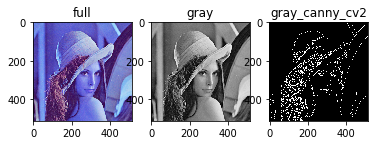

In [3]:
originImage = cv2.imread("../lena.jpg")
grayImage = cv2.cvtColor(originImage,cv2.COLOR_BGR2GRAY)
originImage32x32 = cv2.imread("../lena_32x32.jpg")
grayImage32x32 = cv2.cvtColor(originImage32x32,cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 1)
plt.title("full")
plt.imshow(originImage)
plt.subplot(1, 3, 2)
plt.title("gray")
plt.gray()
plt.imshow(grayImage)
gray_canny_cv2=cv2.Canny(grayImage,50,200)
plt.subplot(1, 3, 3)
plt.title("gray_canny_cv2")
plt.gray()
plt.imshow(gray_canny_cv2)

In [4]:
def show_img(src,desc,r,c,Iid):
    plt.subplot(r, c, Iid)
    plt.title(desc)
    plt.imshow(src)

In [5]:
acc,xy_D=HTLine(gray_canny_cv2,1,1)

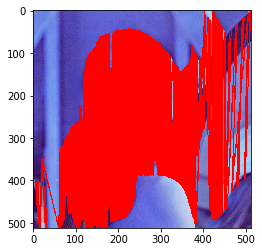

In [6]:
src=originImage
voteThresh=80
nRho,nTht=acc.shape
for r in range(nRho):
    for t in range(nTht):
        if acc[r][t]>voteThresh:
            points=xy_D[(r,t)]
            cv2.line(src,points[0],points[len(points)-1],255,2)
show_img(src,"",1,1,1)